In [1]:
import matplotlib.pyplot as plt 
from ultra.visuals import make_matplotlib_pretty_again 
from scipy.stats import skewnorm
import numpy as np 
import math as m
import vice 

In [2]:
peak = 12 
std = 1 
def gaussian_generator(peak, std, norm): 
    def gaussian(t): 
        return norm/(std * m.sqrt(2 * m.pi)) * m.exp(-(t - peak)**2 / (2 * std**2)) 
    return gaussian 

In [3]:
vice.yields.ccsne.settings["o"] = 0.015 
vice.yields.ccsne.settings["fe"] = 0.0012 
vice.yields.ccsne.settings["sr"] = 3.5e-8 
vice.yields.sneia.settings["o"] = 0 
vice.yields.sneia.settings["fe"] = 0.0017 
vice.yields.sneia.settings["sr"] = 0 

In [10]:
sz = vice.singlezone() 
sz.name = "isner19"
sz.func = lambda t: t / 4 if t < 4 else m.exp(-(t - 4) / 5) + gaussian_generator(12, 1, 1.5)(t)
sz.mode = "sfr" 
sz.dt = 0.01 
sz.bins = np.linspace(-3, 1, 401)
sz.schmidt = True 
out = sz.run(np.linspace(0, 14, 1401), capture = True, overwrite = True) 

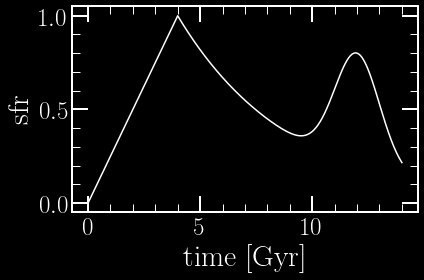

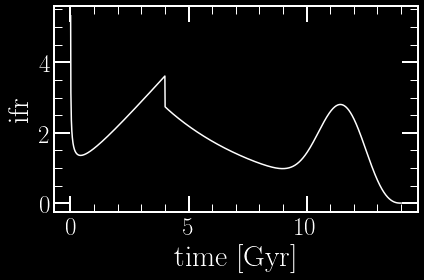

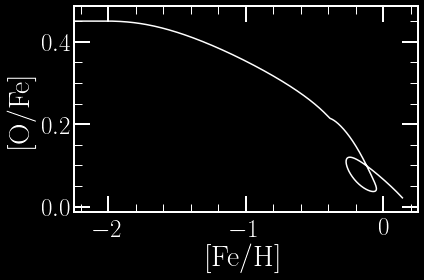

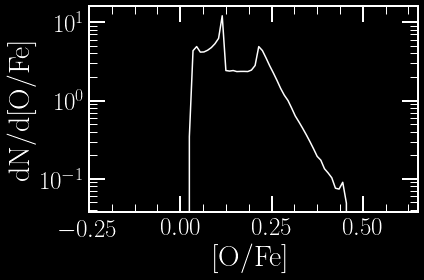

In [12]:
%matplotlib inline 
out.show("sfr") 
out.show("ifr")
out.show("[O/Fe]-[Fe/H]", xlim = [-2.25, 0.25])  
out.show("dN/d[O/Fe]", xlim = [-0.25, 0.65]) 

In [13]:
sz = vice.singlezone() 
sz.name = "isner19_infall" 
sz.func = lambda t: 10 * t**2 * m.exp(-t / 2.2) + gaussian_generator(12, 1, 60)(t) 
sz.bins = np.linspace(-3, 1, 401) 
sz.Mg0 = 0 
sz.schmidt = True 
out = sz.run(np.linspace(0, 14, 1401), capture = True, overwrite = True) 

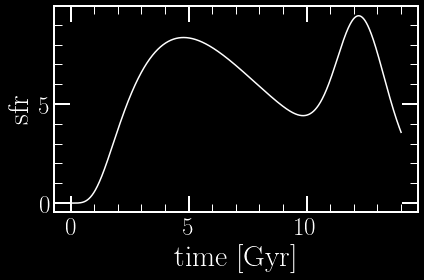

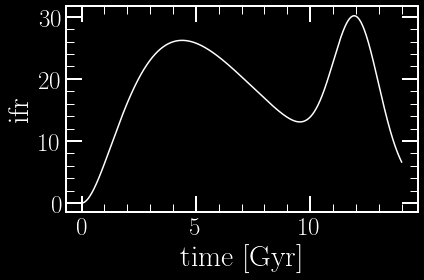

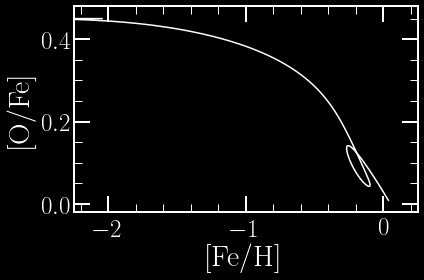

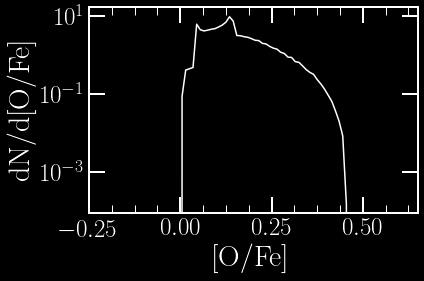

In [14]:
out.show("sfr") 
out.show("ifr")
out.show("[O/Fe]-[Fe/H]", xlim = [-2.25, 0.25])  
out.show("dN/d[O/Fe]", xlim = [-0.25, 0.65]) 